In [3]:
import numpy as np 
import matplotlib 
import matplotlib.pyplot as plt
import random
import pandas as pd



In [4]:
data = pd.read_json("datasetTest100k.json", lines = True, nrows = 5*100000)

In [5]:
jetpt = data[0]
jeteta = data[1]
flavor = data[2]
trackHighData = data[3]
vertexHighData = data[4]

In [6]:
data.shape

(200000, 6)

In [7]:
type(data)

pandas.core.frame.DataFrame

In [8]:
data

,0,1,2,3,4,5
0,47.8712,1.893250,5,"[21.1765, 8.36586, 29.0269, 4.149, 5, 2.68624e...","[32.8902, 3, 7, 0.16244799999999998, 1.59408, ...","[[[0.031162699999999998, 0.0820037, 0.0714865,..."
1,34.9703,0.609755,5,"[5.0077, 3.03583, 2.00754, 0.32992099999999996...","[25.1935, 1, 3, 0.122343, 2.23962, 0.930326999...","[[[-0.029083699999999997, 0.12274499999999999,..."
2,26.5706,-0.530268,5,"[0.8078839999999999, 0.6305649999999999, 1.044...","[-1, -1, -1, inf, -1, -inf]","[[[-0.00689455, -0.379085, 0.0617111, -0.02322..."
3,36.9246,-2.074420,5,"[16.5617, 10.357, 17.5166, 30.4992, 4, 4.35319...","[73.6335, 1, 2, 0.259107, 0.755648, 0.594634]","[[[0.0183914, -0.00212568, -0.0371646999999999..."
4,28.9667,1.512090,5,"[18.0325, 16.1445, 3.29359, 9.00347, 4, 3.3143...","[293.79, 1, 4, 0.0871323, 1.40008, 1.00014]","[[[-0.753196, 3.5972, -0.11093000000000001, 0...."
...,...,...,...,...,...,...
199995,27.9514,-1.952300,0,"[0.594449, -inf, 0.17506000000000002, -inf, 0,...","[-1, -1, -1, inf, -1, -inf]","[[[0.0148769, -0.0165837, 0.0171593, 0.0010783..."
199996,31.7411,0.581113,0,"[0.8840079999999999, 0.0586451, 2.08934, 1.085...","[-1, -1, -1, inf, -1, -inf]","[[[-0.00236544, 0.264679, 0.0364315, 0.115328,..."
199997,43.4182,-1.354190,0,"[2.01423, 0.0571862, 0.018168999999999998, 0.6...","[-1, -1, -1, inf, -1, -inf]","[[[-0.06418589999999999, -0.00209336, -0.06576..."
199998,25.8566,-2.288910,0,"[1.1272, 0.7943779999999999, 0.415697, 0.07267...","[-1, -1, -1, inf, -1, -inf]","[[[-0.0150902, 0.204454, -0.3825, -0.0139872, ..."


In [9]:
data[2]

0         5
1         5
2         5
3         5
4         5
         ..
199995    0
199996    0
199997    0
199998    0
199999    0
Name: 2, Length: 200000, dtype: int64

In [10]:
trkData = np.stack(data[3],axis=0)

trk_high_level_name = ["track_2_d0_significance", "track_3_d0_significance",
                       "track_2_z0_significance", "track_3_z0_significance",
                       "n_tracks_over_d0_threshold", "jet_prob", "jet_width_eta", "jet_width_phi"]

for i, trkName in enumerate(trk_high_level_name):
    tmpArr = np.array(trkData[:,i],dtype="float32")
    data[trkName] = tmpArr

# Smeared Data    
trk_high_level_smear = [{"name":"track_2_d0_significance","mu":0,"sigma":1,"index":0},
                        {"name":"track_3_d0_significance","mu":0,"sigma":2,"index":1},
                        {"name":"track_2_z0_significance","mu":0,"sigma":1,"index":2},
                        {"name":"track_3_z0_significance","mu":0,"sigma":2,"index":3},
                        #"n_tracks_over_d0_threshold"
                        #"jet_prob", 
                        {"name":"jet_width_eta","mu":0,"sigma":0.05,"index":6},
                        {"name":"jet_width_phi","mu":0,"sigma":0.05,"index":7}
                       ]

for trkSmear in trk_high_level_smear:
    tmpArr = np.array(trkData[:,trkSmear["index"]],dtype="float32")
    data[trkSmear["name"]+"_data"] = (tmpArr**2 + 
                                     np.random.normal(trkSmear["mu"], trkSmear["sigma"], tmpArr.size)**2)**0.5    
    
    
vtxData = np.stack(data[4],axis=0)
    
vtx_high_level_name = ["vertex_significance", "n_secondary_vertices", "n_secondary_vertex_tracks",
                       "delta_r_vertex", "vertex_mass", "vertex_energy_fraction"]

for i, vtxName in enumerate(vtx_high_level_name):
    tmpArr = np.array(vtxData[:,i],dtype="float32")
    data[vtxName] = tmpArr

print(data.shape)
#print(data[data["track_2_d0_significance"] == -np.inf])
print(data.shape)
dataClean = data[data["track_2_d0_significance"] != -np.inf]

print(dataClean.shape)

(200000, 26)
(200000, 26)
(186110, 26)


In [11]:
data

,0,1,2,3,4,5,track_2_d0_significance,track_3_d0_significance,track_2_z0_significance,track_3_z0_significance,...,track_2_z0_significance_data,track_3_z0_significance_data,jet_width_eta_data,jet_width_phi_data,vertex_significance,n_secondary_vertices,n_secondary_vertex_tracks,delta_r_vertex,vertex_mass,vertex_energy_fraction
0,47.8712,1.893250,5,"[21.1765, 8.36586, 29.0269, 4.149, 5, 2.68624e...","[32.8902, 3, 7, 0.16244799999999998, 1.59408, ...","[[[0.031162699999999998, 0.0820037, 0.0714865,...",21.176500,8.365860,29.026899,4.149000,...,29.030341,4.218842,0.066865,0.095384,32.890202,3.0,7.0,0.162448,1.594080,0.862678
1,34.9703,0.609755,5,"[5.0077, 3.03583, 2.00754, 0.32992099999999996...","[25.1935, 1, 3, 0.122343, 2.23962, 0.930326999...","[[[-0.029083699999999997, 0.12274499999999999,...",5.007700,3.035830,2.007540,0.329921,...,2.157105,0.364212,0.066765,0.150129,25.193501,1.0,3.0,0.122343,2.239620,0.930327
2,26.5706,-0.530268,5,"[0.8078839999999999, 0.6305649999999999, 1.044...","[-1, -1, -1, inf, -1, -inf]","[[[-0.00689455, -0.379085, 0.0617111, -0.02322...",0.807884,0.630565,1.044520,1.283360,...,1.229013,2.057375,0.097539,0.161517,-1.000000,-1.0,-1.0,inf,-1.000000,-inf
3,36.9246,-2.074420,5,"[16.5617, 10.357, 17.5166, 30.4992, 4, 4.35319...","[73.6335, 1, 2, 0.259107, 0.755648, 0.594634]","[[[0.0183914, -0.00212568, -0.0371646999999999...",16.561701,10.357000,17.516600,30.499201,...,17.548694,30.698572,0.166184,0.119286,73.633499,1.0,2.0,0.259107,0.755648,0.594634
4,28.9667,1.512090,5,"[18.0325, 16.1445, 3.29359, 9.00347, 4, 3.3143...","[293.79, 1, 4, 0.0871323, 1.40008, 1.00014]","[[[-0.753196, 3.5972, -0.11093000000000001, 0....",18.032499,16.144501,3.293590,9.003470,...,3.531341,9.043188,0.088742,0.095072,293.790009,1.0,4.0,0.087132,1.400080,1.000140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,27.9514,-1.952300,0,"[0.594449, -inf, 0.17506000000000002, -inf, 0,...","[-1, -1, -1, inf, -1, -inf]","[[[0.0148769, -0.0165837, 0.0171593, 0.0010783...",0.594449,-inf,0.175060,-inf,...,2.084663,inf,0.134288,0.130906,-1.000000,-1.0,-1.0,inf,-1.000000,-inf
199996,31.7411,0.581113,0,"[0.8840079999999999, 0.0586451, 2.08934, 1.085...","[-1, -1, -1, inf, -1, -inf]","[[[-0.00236544, 0.264679, 0.0364315, 0.115328,...",0.884008,0.058645,2.089340,1.085600,...,2.226253,2.218271,0.141523,0.175892,-1.000000,-1.0,-1.0,inf,-1.000000,-inf
199997,43.4182,-1.354190,0,"[2.01423, 0.0571862, 0.018168999999999998, 0.6...","[-1, -1, -1, inf, -1, -inf]","[[[-0.06418589999999999, -0.00209336, -0.06576...",2.014230,0.057186,0.018169,0.646206,...,1.571298,0.651033,0.129388,0.065205,-1.000000,-1.0,-1.0,inf,-1.000000,-inf
199998,25.8566,-2.288910,0,"[1.1272, 0.7943779999999999, 0.415697, 0.07267...","[-1, -1, -1, inf, -1, -inf]","[[[-0.0150902, 0.204454, -0.3825, -0.0139872, ...",1.127200,0.794378,0.415697,0.072679,...,0.591128,0.846412,0.078944,0.084225,-1.000000,-1.0,-1.0,inf,-1.000000,-inf


In [12]:
bJets = dataClean[dataClean[2] == 5]
lJets = dataClean[dataClean[2] == 0]
cJets = dataClean[dataClean[2] == 4]

print("nTotal",dataClean.shape[0])
print("nBJets",bJets.shape[0])
print("nCJets",cJets.shape[0])
print("nLJets",lJets.shape[0])

nTotal 186110
nBJets 89228
nCJets 20063
nLJets 76819


In [13]:
def normHist(inData,bins,color,histtype,linestyle="-"):
    counts, bins = np.histogram(inData,bins=bins)
    totalCounts = counts.sum()
    normCounts = counts/totalCounts
    plt.hist(bins[:-1], bins, weights=normCounts,color=color,histtype=histtype,linestyle=linestyle)

In [14]:
def plotVar(bData,cData,lData,xLow,xHigh,nBins,logy=False,norm=True):
    if norm:
        normHist(bData,bins=np.linspace(xLow,xHigh,nBins),color="r",histtype='step')
        normHist(lData,bins=np.linspace(xLow,xHigh,nBins),color="k",histtype='step')
        normHist(cData,bins=np.linspace(xLow,xHigh,nBins),color="b",histtype='step')
    else:
        plt.hist(bData,bins=np.linspace(xLow,xHigh,nBins),color="r",histtype='step')
        plt.hist(lData,bins=np.linspace(xLow,xHigh,nBins),color="k",histtype='step')
        plt.hist(cData,bins=np.linspace(xLow,xHigh,nBins),color="b",histtype='step')
    if logy: plt.yscale('log')  
    

In [15]:
def plotVarAll(varName,xLow,xHigh,nBins,logy=False):
    plotVar(bJets[varName],
            cJets[varName],
            lJets[varName],
            xLow,xHigh,nBins,logy=logy)

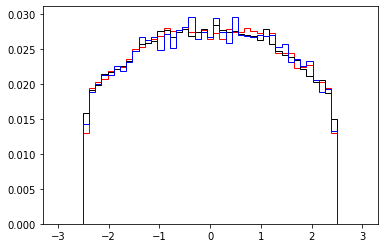

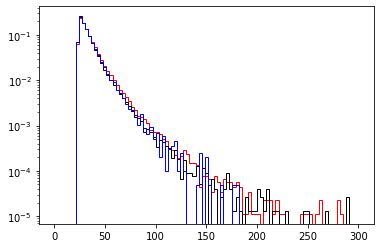

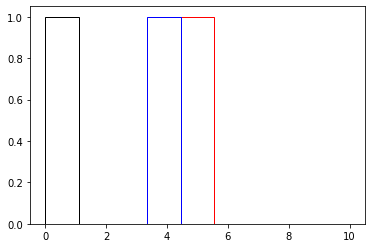

In [16]:
plotVarAll(1,-3,3,50,logy=False)
plt.show()
plotVarAll(0,0,300,100,logy=True)
plt.show()
plotVarAll(2,0,10,10,logy=False)

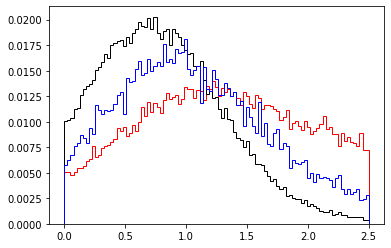

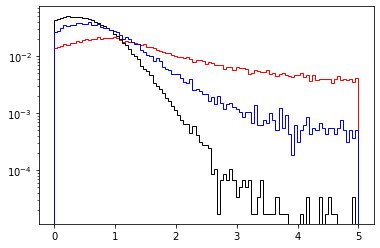

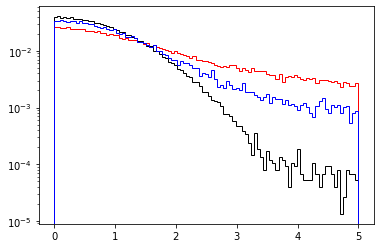

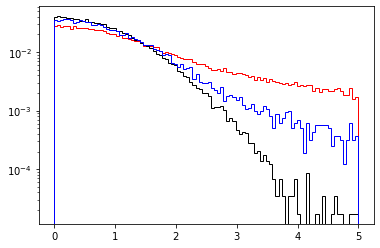

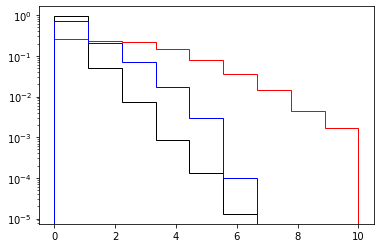

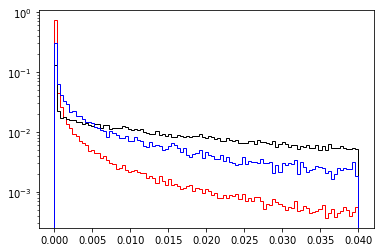

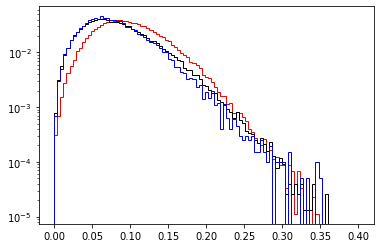

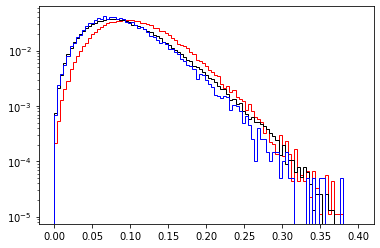

In [17]:
plotVarAll("track_2_d0_significance",0,2.5,100,logy=False)
plt.show()
plotVarAll("track_3_d0_significance",0,5.0,100,logy=True)
plt.show()
plotVarAll("track_2_z0_significance",0,5.0,100,logy=True)
plt.show()
plotVarAll("track_3_z0_significance",0,5.0,100,logy=True)
plt.show()
plotVarAll("n_tracks_over_d0_threshold", 0,10.0,10,logy=True)
plt.show()
plotVarAll("jet_prob", 0,0.04,100,logy=True)
plt.show()
plotVarAll("jet_width_eta", 0,0.4,100,logy=True)
plt.show()
plotVarAll("jet_width_phi",0,0.4,100,logy=True)

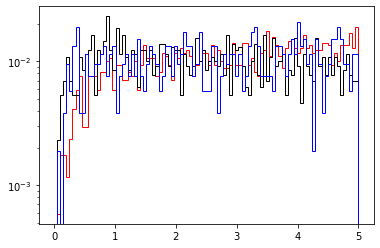

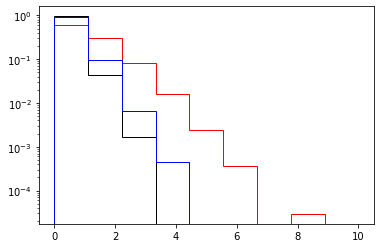

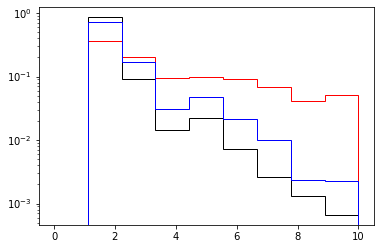

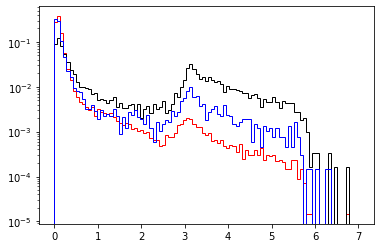

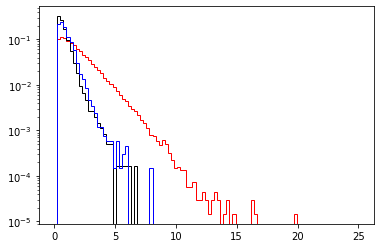

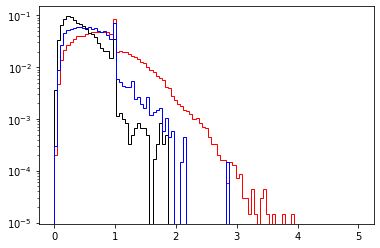

In [18]:
plotVarAll("vertex_significance",0,5.0,100,logy=True)
plt.show()
plotVarAll("n_secondary_vertices",0,10.0,10,logy=True)
plt.show()
plotVarAll("n_secondary_vertex_tracks",0,10.0,10,logy=True)
plt.show()
plotVarAll("delta_r_vertex", 0,7,100,logy=True)
plt.show()
plotVarAll("vertex_mass", 0,25,100,logy=True)
plt.show()
plotVarAll("vertex_energy_fraction",0,5.0,100,logy=True)

# Plot the smearing

In [19]:
def plotVarVsData(bMC,bData,lMC,lData,xLow,xHigh,nBins,logy=False,norm=True):
    if norm:
        normHist(bMC,  bins=np.linspace(xLow,xHigh,nBins),color="r",histtype='step',linestyle="-")
        normHist(bData,bins=np.linspace(xLow,xHigh,nBins),color="r",histtype='step',linestyle=":")        
        normHist(lMC,  bins=np.linspace(xLow,xHigh,nBins),color="k",histtype='step',linestyle="-")
        normHist(lData,bins=np.linspace(xLow,xHigh,nBins),color="k",histtype='step',linestyle=":")                

    else:
        plt.hist(vData,bins=np.linspace(xLow,xHigh,nBins),color="r",histtype='step')
        plt.hist(dData,bins=np.linspace(xLow,xHigh,nBins),color="k",histtype='step')
    if logy: plt.yscale('log') 

In [20]:
def plotVsData(varName,xLow,xHigh,nBins,logy=False):
    plotVarVsData(bJets[varName],
                  bJets[varName+"_data"],
                  lJets[varName],
                  lJets[varName+"_data"],
                  xLow,xHigh,nBins,logy=logy)

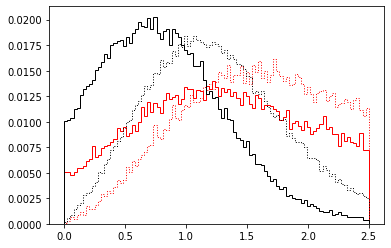

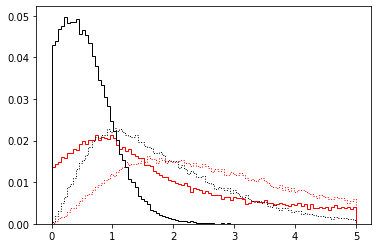

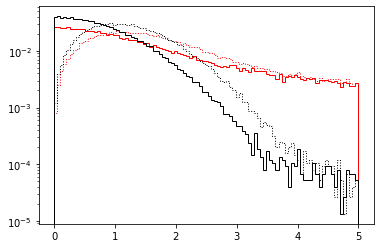

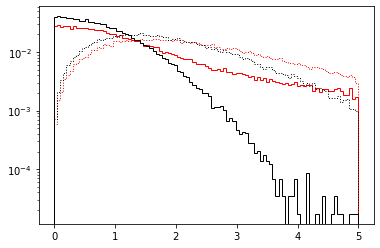

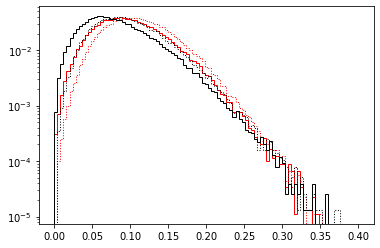

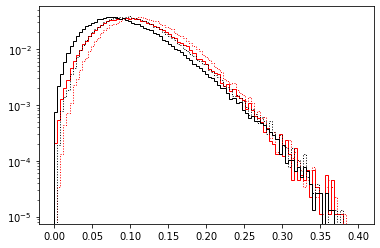

In [21]:
plotVsData("track_2_d0_significance",0,2.5,100,logy=False)
plt.show()
plotVsData("track_3_d0_significance",0,5.0,100,logy=False)
plt.show()
plotVsData("track_2_z0_significance",0,5.0,100,logy=True)
plt.show()
plotVsData("track_3_z0_significance",0,5.0,100,logy=True)
plt.show()
plotVsData("jet_width_eta", 0,0.4,100,logy=True)
plt.show()
plotVsData("jet_width_phi",0,0.4,100,logy=True)